3種類のワインに対する様々な計測値から、  
ランダムフォレストを使用してワインの種類を分類する。

In [76]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9444444444444444

特徴量の出力と可視化

In [77]:
for i in range(len(data['feature_names'])):
    print('\t{0:30s} : {1:>.6f}'.format(data.feature_names[i], model.feature_importances_[i]))

	alcohol                        : 0.069777
	malic_acid                     : 0.007743
	ash                            : 0.007280
	alcalinity_of_ash              : 0.018304
	magnesium                      : 0.027393
	total_phenols                  : 0.135013
	flavanoids                     : 0.199023
	nonflavanoid_phenols           : 0.007601
	proanthocyanins                : 0.008553
	color_intensity                : 0.258861
	hue                            : 0.085266
	od280/od315_of_diluted_wines   : 0.100046
	proline                        : 0.075141


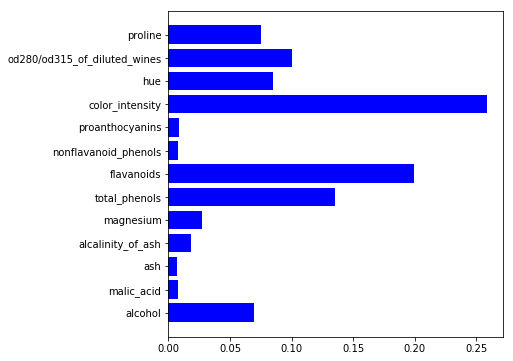

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

features = data.data.shape[1]
coefficient = model.feature_importances_
indices = np.argsort(coefficient)

plt.figure(figsize=(6,6))
plt.barh(range(features), coefficient, color='b', align='center')
plt.yticks(np.arange(features), data.feature_names)
#plt.yticks(range(len(indices)))
#plt.ytickslabels(features[indices])
plt.show()

昇順で並べ替え。pandasじゃないと作れなかった。

In [79]:
import pandas as pd
importance = pd.DataFrame({ '変数' :data.feature_names, '重要度' :model.feature_importances_})
importance_s = importance.sort_values("重要度", ascending=False)
importance_s

,変数,重要度
9,color_intensity,0.258861
6,flavanoids,0.199023
5,total_phenols,0.135013
11,od280/od315_of_diluted_wines,0.100046
10,hue,0.085266
12,proline,0.075141
0,alcohol,0.069777
4,magnesium,0.027393
3,alcalinity_of_ash,0.018304
8,proanthocyanins,0.008553


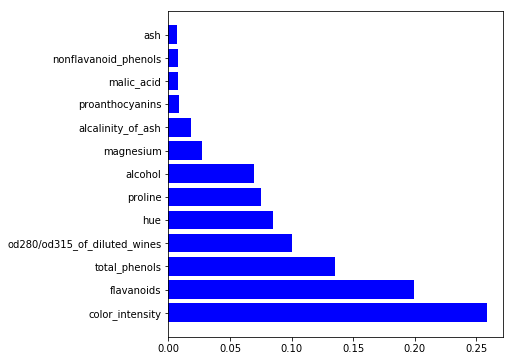

In [80]:
plt.figure(figsize=(6,6))
plt.barh(range(features), importance_s["重要度"], color='b', align='center')
plt.yticks(np.arange(features), importance_s["変数"])
plt.show()